<a href="https://colab.research.google.com/github/Adheena-Ajayghosh/Assignments/blob/main/project/project%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT 7**

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

**Load the datasets**

In [ ]:
import pandas as pd
import numpy  as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
path = "/content/uber.csv"
df = pd.read_csv(path)
print(df)

        Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225 

In [ ]:
df.shape


(200000, 9)

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


**Data Preprocessing and Cleaning**


here handle missing values,if necessary, remove outliers, and converting data types as needed.

In [ ]:
#find any null value present
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
#drop null rows
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
# replace null value by mean and median value
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [ ]:
# display the data types of each column in the DataFrame
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

**Heversine formula**

hav(θ) = sin**2(θ/2).

A mathematical equation used to calculate the distance between two points on a sphere, given their latitude and longitude coordinates. It considers the curvature of the Earth and is commonly used in navigation and geographical calculations.

In [ ]:
#calculating the distance between pickup and drop co-ordinates
def haversine(lon_1, lon_2, lat_1, lat_2):

    lon_1, lon_2, lat_1, lat_2 = map(np.radians,[lon_1, lon_2, lat_1, lat_2])#degree to radians

    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1

    km = 2 * 6371 *np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1)* np.cos(lat_2)*np.sin(diff_lon/2.0)**2))
    return km


In [ ]:
#find distance travelled per ride
df['distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])

In [ ]:
#round it to 2 decimel points
df['distance'] = df['distance'].astype(float).round(2)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fareamount')

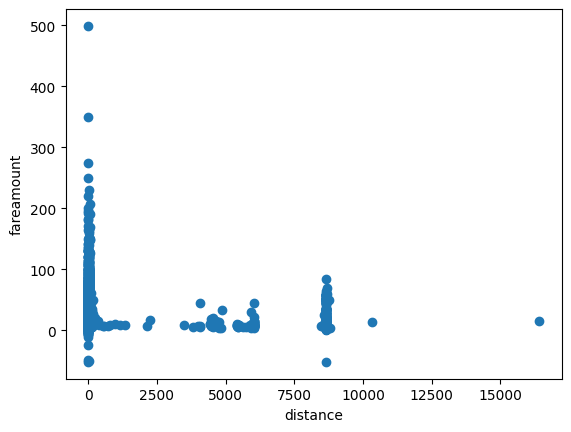

In [ ]:
plt.scatter(df['distance'],df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fareamount")

In [ ]:
#outliers
#we can get rid of the trips with very large distance that are outliers
df.drop(df[df['distance'] > 60].index, inplace = True)
df.drop(df[df['distance'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.shape


(193490, 10)

In [ ]:
#removing rows with non-plausible fare amounts and distance travelled
df.drop(df[(df['fare_amount'] >100)& (df['distance'] <1)].index, inplace = True)
df.drop(df[(df['fare_amount'] <100)& (df['distance'] >100)].index, inplace = True)
df.shape

(193481, 10)

Text(0, 0.5, 'fare_amount')

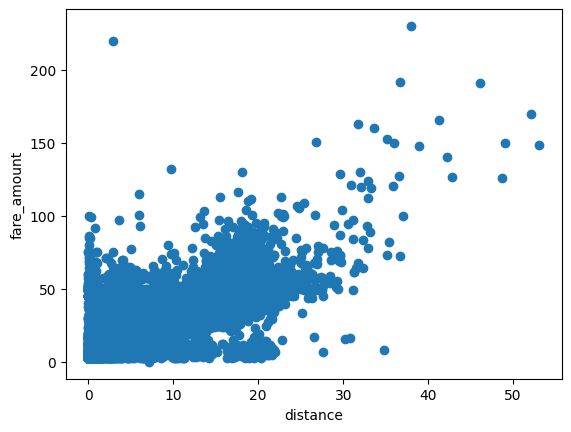

In [ ]:
plt.scatter(df['distance'],df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

In [ ]:
# Create a new DataFrame with specific columns
df2 = pd.DataFrame().assign(fare=df['fare_amount'], distance=df['distance'])
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 193481 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      193481 non-null  float64
 1   distance  193481 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


In [ ]:
df2.shape

(193481, 2)

<ipython-input-20-c8ee5e50cb16>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['fare'],color='g',hist_kws=dict(edgecolor="black",linewidth=2),bins=30)


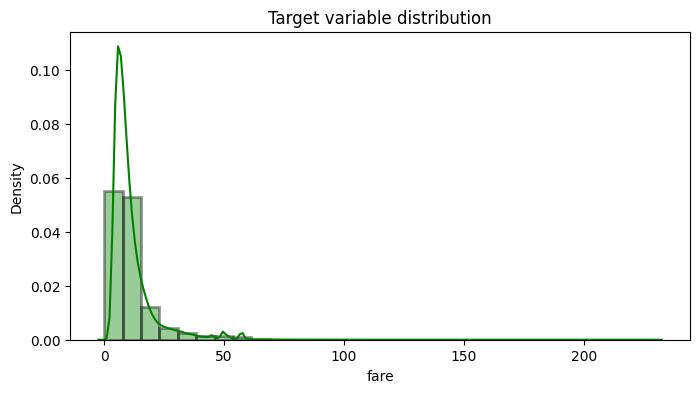

In [ ]:
# plot target fare distribution
plt.figure(figsize=[8,4])
sns.distplot(df2['fare'],color='g',hist_kws=dict(edgecolor="black",linewidth=2),bins=30)
plt.title('Target variable distribution')
plt.show()

Text(0, 0.5, 'fare_amount')

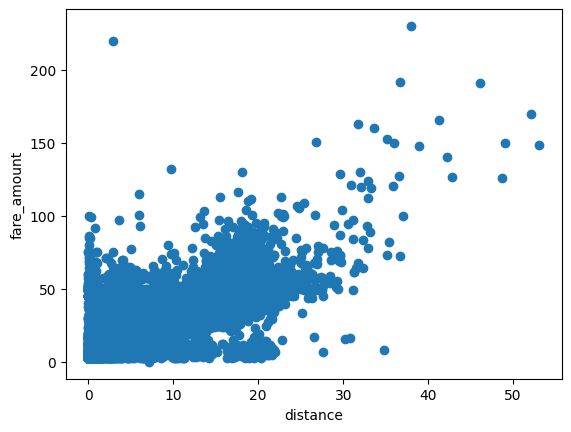

In [ ]:
#scatterplots
plt.scatter(df2['distance'],df2['fare'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

In [ ]:
x=df2['fare']
y=df2['distance']

In [ ]:
#independent variable
x = df2['distance'].values.reshape(-1,1)

#independent variable
y = df2['fare'].values.reshape(-1,1)

In [ ]:
#scale by standardscalar
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
x_std = std.fit_transform(x)



In [ ]:
#split in test -train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_std,y_std,test_size=0.2,random_state=0)



In [ ]:
#simple linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#prdedict test values
y_pred = l_reg.predict(x_test)

In [ ]:
#find error
from sklearn import metrics
print('Mean absolute error:', metrics.mean_absolute_error (y_test,y_pred))
print('Mean squared error:', metrics.mean_squared_error  (y_test,y_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 0.23979020298617273
Mean squared error: 0.19845894128014688
Root mean squared error: 0.4454873076532561


Text(0.5, 0, 'distance')

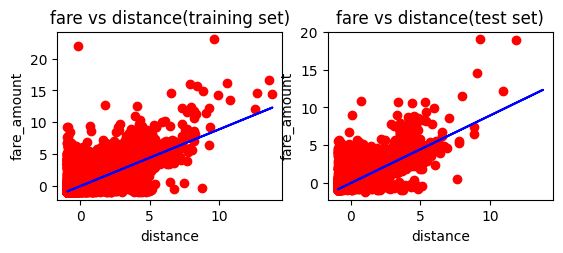

In [ ]:
#final plot
plt.subplot(2,2,1)
plt.scatter(x_train,y_train,color ='red')
plt.plot(x_train,l_reg.predict(x_train),color="blue")
plt.title("fare vs distance(training set)")
plt.ylabel("fare_amount")
plt.xlabel("distance")


plt.subplot(2,2,2)
plt.scatter(x_test,y_test,color ='red')
plt.plot(x_train,l_reg.predict(x_train),color="blue")
plt.title("fare vs distance(test set)")
plt.ylabel("fare_amount")
plt.xlabel("distance")